## Final Project Submission

Please fill out:
* Student name: Jeremy Nguyo 
* Student pace: Full time
* Scheduled project review date/time: 
* Instructor name: Nikita Njoroge
* Blog post URL:


##  DATA PREPARATION

## Importing libraries we may need for our analysis 

In [77]:
# pandas for data analysis and manipulation
import pandas as pd
# numpy for numerical operations
import numpy as np
# seaborn and matplotlib for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# sqlite library for connect to sql database
import sqlite3

## Importing the dataframes

In [78]:
# Connect to the sqlite 'im' database file from IMDb
conn = sqlite3.connect('zippedData/im.db')
# The list of tables in the database
tables_db = pd.read_sql("""SELECT name FROM sqlite_master WHERE type = 'table';""", conn)
tables_db

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### For the analysis I used two tables for the IMDb database. Namely: movie_basics and movie_ratings

In [79]:
# Preview of all the columns and the first five rows of the movie_basics table
movie_basics_df = pd.read_sql(""" SELECT * FROM movie_basics; """,conn)
movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [80]:
# Checked to see the datatype, number of columns and rows of the movie_basics table
movie_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [81]:
# Understanding the parameters of the data that I worked with
movie_basics_df.nunique()

movie_id           146144
primary_title      136071
original_title     137773
start_year             19
runtime_minutes       367
genres               1085
dtype: int64

In [82]:
# Checked for null values in the movie_basic_df
movie_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [83]:
# Preview of all the columns and the first five rows of the movie_ratings table
movie_ratings_df = pd.read_sql(""" SELECT * FROM movie_ratings; """,conn)
movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [84]:
# Checking to see the datatype, number of columns and rows of the movie_ratings table
movie_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [85]:
# Understanding the parameters of the data that I worked with
movie_ratings_df.nunique()

movie_id         73856
averagerating       91
numvotes          7349
dtype: int64

In [86]:
# Checked for null values in the movie_ratings_df
movie_ratings_df.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

In [87]:
# Statistical Summary of the Data
movie_ratings_df.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The two datasets, movie_ratings and movie_basics share the same primary key(movie_id). I joined them using an inner join.

#### I also used the dataset from tn movie budgets for our analysis

In [88]:
# Preview of all the columns and the first five rows of the bom dataset
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [89]:
# Checked to see the datatype, number of columns and rows of the movie_budgets table
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [90]:
# Understanding the parameters of the data I worked with
movie_budgets_df.nunique()

id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64

In [91]:
# Checked for null values in the movies_budgets_df
movie_budgets_df.isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [92]:
# Statistical Summary of the data
movie_budgets_df.describe()

,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


## DATA CLEANING

Checked for Validity, Accuracy, Completeness,Consistency and Uniformity of the Data

#### Cleaning the movie_basics_df

In the movie_basics_df, I needed the genres column and it had some missing values 

In [93]:
# Checked for null values
movie_basics_df['genres'].isnull().sum()

5408

In [94]:
# Had a look at these missing values
# Filtered to select only the missing values
filt = movie_basics_df['genres'].isnull()

# Viewed the missing values and assigned them to a variable
genres_missing_values_df =  movie_basics_df.loc[filt]
genres_missing_values_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
16,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,NaN,None
22,tt0253093,Gangavataran,Gangavataran,2018,134.0,None
35,tt0306058,Second Coming,Second Coming,2012,95.0,None
40,tt0326592,The Overnight,The Overnight,2010,88.0,None
44,tt0330811,Regret Not Speaking,Regret Not Speaking,2011,NaN,None
...,...,...,...,...,...,...
146088,tt9907396,Footloose in the Cotswolds - Part 1,Footloose in the Cotswolds - Part 1,2016,118.0,None
146089,tt9907608,Footloose in the Cotswolds - Part 2,Footloose in the Cotswolds - Part 2,2016,102.0,None
146107,tt9910922,Doctor Who Augmented Reality: Times Magazine,Doctor Who Augmented Reality: Times Magazine,2013,NaN,None
146129,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None


In [95]:
# Determining what percentage of rows in this column contain missing values
total_num_rows = len(movie_basics_df['genres'])
total_num_missing_rows = len(genres_missing_values_df['genres'])
percentage = total_num_missing_rows/total_num_rows
percentage

0.037004598204510616

The genre is quite a unique value that can not just be randomly assigned to a movie. Being that there are only a few missing values, 3.7% of the total, then I dropped these rows as it seemed more reasonable. 

In [96]:
movie_basics_df.dropna(subset='genres')

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146138,tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [97]:
# dropped the rows with the missing values in the genres column
movie_basics_df.dropna(subset='genres', inplace=True)
# Checked to see if the rows had been dropped
movie_basics_df['genres'].isnull().sum()

0

##### Joining the datasets

The two datasets, movie_ratings_df and movie_basics_df, share the same primary key(movie_id) which will be set as the index and joined using an inner join

In [98]:
movie_ratings_df.set_index('movie_id',inplace=True)
movie_ratings_df

,averagerating,numvotes
movie_id,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [99]:
movie_basics_df.set_index('movie_id',inplace=True)
movie_basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
movie_id,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916428,The Secret of China,The Secret of China,2019,NaN,"Adventure,History,War"
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary


In [100]:
# joined the two datasets and  assigned them to a new variable
movie_basics_ratings_df = movie_basics_df.join(movie_ratings_df, how='inner')
movie_basics_ratings_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
movie_id,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


In [101]:
# reset the index of the dataframe and inspected the data
movie_basics_ratings_df.reset_index(inplace=True)
movie_basics_ratings_df.nunique()

movie_id           73052
primary_title      69248
original_title     70345
start_year            10
runtime_minutes      289
genres               923
averagerating         91
numvotes            7349
dtype: int64

In [102]:
# We had duplicated values for the primary title and original title and I had to inspect them further
filt = movie_basics_ratings_df.duplicated(subset=['primary_title'], keep= False)
movie_basics_ratings_df.loc[filt].sort_values(by=['primary_title'])

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
25696,tt2518788,1,1,2013,112.0,"Documentary,History,Sport",8.0,3452
12137,tt1859618,1,1,2019,100.0,Drama,9.2,13
52353,tt5282238,10,10,2015,90.0,Thriller,4.7,7
13686,tt1941430,10,10,2011,NaN,Action,3.4,9
26467,tt2579680,100% Love,100% Love,2012,166.0,"Comedy,Drama,Romance",6.0,296
...,...,...,...,...,...,...,...,...
39286,tt3763866,Zoom,Zoom,2015,96.0,"Animation,Comedy,Drama",6.1,2323
33646,tt3257638,Zurich,Zurich,2015,89.0,Drama,6.0,385
33313,tt3229936,Zurich,Und morgen mittag bin ich tot,2013,103.0,Drama,7.2,214
14137,tt1961689,Éden,Éden,2011,64.0,Documentary,7.1,8


It was noted that some movies shared the same title but all other attributes were different including the movie_id. I made the assumption that these were all different movies.

#### Cleaning the movie_budgets_df

In the movie_budgets_df, the Id column had repetitive values. See below

In [103]:
print('Number of unique values in the id column are:', movie_budgets_df['id'].nunique(), 'out of a total of:', len(movie_budgets_df['id']))

Number of unique values in the id column are: 100 out of a total of: 5782


Since this column had no other use other than being a unique identifier,It was wise to drop it since it didn't serve any purpose. i considered using the names column as the index once I inspect it further since it seemed to have duplicates.

In [104]:
#dropping the id column
movie_budgets_df.drop(columns='id', inplace=True)
movie_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
5777,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Inspected the movie column and to see where there were duplicates

In [105]:
print('The number of unique values in the column is:', movie_budgets_df['movie'].nunique(), 'out of a total of:', len(movie_budgets_df['movie']))

The number of unique values in the column is: 5698 out of a total of: 5782


In [106]:
# filtered all the duplicated movie names and sort by the name to inspect the rows further
filt = movie_budgets_df.duplicated(subset=['movie'], keep=False)
movie_budgets_df.loc[filt].sort_values(by=['movie']).head(20)

,release_date,movie,production_budget,domestic_gross,worldwide_gross
4270,"Dec 23, 1954","20,000 Leagues Under the Sea","$5,000,000","$28,200,000","$28,200,000"
5614,"Dec 24, 1916","20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
1648,"Apr 30, 2010",A Nightmare on Elm Street,"$35,000,000","$63,075,011","$117,729,621"
5016,"Nov 9, 1984",A Nightmare on Elm Street,"$1,800,000","$25,504,513","$25,504,513"
2032,"Nov 11, 1992",Aladdin,"$28,000,000","$217,350,219","$504,050,219"
80,"May 24, 2019",Aladdin,"$182,000,000","$246,734,314","$619,234,314"
50,"Mar 5, 2010",Alice in Wonderland,"$200,000,000","$334,191,110","$1,025,491,110"
4759,"Jul 28, 1951",Alice in Wonderland,"$3,000,000",$0,$0
4120,"Oct 17, 1956",Around the World in 80 Days,"$6,000,000","$42,000,000","$42,000,000"
340,"Jun 16, 2004",Around the World in 80 Days,"$110,000,000","$24,004,159","$72,004,159"


In [107]:
# further inspection to see whether there were instances of having both the movie and release_date of one record duplicated 
filt2 = movie_budgets_df.duplicated(subset=['movie','release_date'], keep=False)
movie_budgets_df.loc[filt2].sort_values(by=['movie']).head(60)

,release_date,movie,production_budget,domestic_gross,worldwide_gross


As seen above, even though the names have been duplicated, these are different movies based on the release date. There are no instances where the name and release date are both similar in one record.  So I assumed that the recent dated movies are remakes of the older ones hence the records were kept. 

The prodcution_budget, domestic_gross and worldwide_gross columns were not integers and this would make computation quite difficult.

In [108]:
# Inspection of the values showed that the values were strings
movie_budgets_df['domestic_gross'].apply(lambda x: type(x))

0       <class 'str'>
1       <class 'str'>
2       <class 'str'>
3       <class 'str'>
4       <class 'str'>
            ...      
5777    <class 'str'>
5778    <class 'str'>
5779    <class 'str'>
5780    <class 'str'>
5781    <class 'str'>
Name: domestic_gross, Length: 5782, dtype: object

I had to get rid of the $ sign, the commas and convert the values to integers

In [109]:
# got rid of the $ sign, commas and converted the values into integers and the reassigned the columns
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(lambda x: x[1:]).str.replace(',', '').astype('int64')
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(lambda x: x[1:]).str.replace(',', '').astype('int64')
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x[1:]).str.replace(',', '').astype('int64')

In [110]:
# checked to see if the values had been changed to integers
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 226.0+ KB


In [111]:
# further inspection of the values to see whether the data had 0s as the values in the worldwide_gross and production_budget columns
filt = (movie_budgets_df['production_budget'] == 0) | (movie_budgets_df['worldwide_gross'] == 0)
missing_gross_amounts_df = movie_budgets_df.loc[filt]
print('The number of records that had either the production_budget or world_wide gross as 0 were:', len(missing_gross_amounts_df))
missing_gross_amounts_df

The number of records that had either the production_budget or world_wide gross as 0 were: 367


,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,"Dec 31, 2020",Moonfall,150000000,0,0
479,"Dec 13, 2017",Bright,90000000,0,0
480,"Dec 31, 2019",Army of the Dead,90000000,0,0
535,"Feb 21, 2020",Call of the Wild,82000000,0,0
670,"Aug 30, 2019",PLAYMOBIL,75000000,0,0
...,...,...,...,...,...
5761,"Dec 31, 2014",Stories of Our Lives,15000,0,0
5764,"Dec 31, 2007",Tin Can Man,12000,0,0
5771,"May 19, 2015",Family Motocross,10000,0,0
5777,"Dec 31, 2018",Red 11,7000,0,0


In [112]:
# Determined what percentage of rows in this columns contain missing values
total_num_rows = len(movie_budgets_df)
total_num_missing_rows = len(missing_gross_amounts_df)
percentage = total_num_missing_rows/total_num_rows
percentage

0.06347284676582497

6.3% of the values were zeros. These were not values that i could randomly assign since they were unique. 6.3% was not much, so it was best
to just drop these rows.

In [113]:
# selected the columns with a value of 0 and then dropped them
filt = (movie_budgets_df['production_budget'] == 0) | (movie_budgets_df['worldwide_gross'] == 0)
movie_budgets_df.drop(movie_budgets_df[filt].index, inplace=True)
movie_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644
5776,"Dec 31, 2004",The Mongol King,7000,900,900
5778,"Apr 2, 1999",Following,6000,48482,240495
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [114]:
# checked whether the rows had been dropped
movie_budgets_df.loc[filt]

,release_date,movie,production_budget,domestic_gross,worldwide_gross


To make the analysis of the movie_budget_df easier, I extracted the year from the release_date column and created a new
column 'release_year'

In [115]:
# sliced through the values of the release_date column and extracted the year, converted it to an integer and added it to a new colum
# 'release_year'
movie_budgets_df['release_year'] = movie_budgets_df['release_date'].apply(lambda x:x[-4:]).astype(int)
movie_budgets_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...
5775,"May 26, 2006",Cavite,7000,70071,71644,2006
5776,"Dec 31, 2004",The Mongol King,7000,900,900,2004
5778,"Apr 2, 1999",Following,6000,48482,240495,1999
5779,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005


In [116]:
# checked to see if the years were all consistent.
movie_budgets_df['release_year'].value_counts().head()

2010    258
2006    253
2008    249
2015    242
2011    241
Name: release_year, dtype: int64

In [117]:
movie_budgets_df.sort_values(by='release_year', ascending=True)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
5677,"Feb 8, 1915",The Birth of a Nation,110000,10000000,11000000,1915
5614,"Dec 24, 1916","20,000 Leagues Under the Sea",200000,8000000,8000000,1916
5683,"Sep 17, 1920",Over the Hill to the Poorhouse,100000,3000000,3000000,1920
4569,"Dec 30, 1925",Ben-Hur: A Tale of the Christ,3900000,9000000,9000000,1925
5606,"Nov 19, 1925",The Big Parade,245000,11000000,22000000,1925
...,...,...,...,...,...,...
1176,"Apr 12, 2019",Hellboy,50000000,21903748,40725492,2019
3835,"Jan 16, 2019",Dragon Ball Super: Broly,8500000,30376755,122747755,2019
496,"Apr 5, 2019",Shazam!,85000000,139606856,362899733,2019
3777,"Feb 13, 2019",Happy Death Day 2U,9000000,28051045,64179495,2019


The dataset contained movies dating from 1915 to 2019. I removed movies that were too old. I used movies from the year 2000 to 2019 which I thought could give a more accurate prediction of the trend.

In [118]:
# filtered out the rows with the release year as below 2000
filt = movie_budgets_df['release_year'] < 2000
movie_budgets_df.drop(movie_budgets_df[filt].index, inplace=True)
movie_budgets_df.sort_values(by='release_year')

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
2134,"Dec 22, 2000","O Brother, Where Art Thou?",26000000,45506619,75763814,2000
4281,"Oct 13, 2000",Billy Elliot,5000000,21995263,109253745,2000
3794,"Sep 8, 2000",The Way of the Gun,9000000,6047856,13061935,2000
379,"Dec 15, 2000",The Emperor's New Groove,100000000,89296573,169296573,2000
4322,"Oct 6, 2000",Digimon: The Movie,5000000,9628751,16628751,2000
...,...,...,...,...,...,...
3871,"May 3, 2019",The Intruder,8000000,35095904,36005871,2019
1474,"May 3, 2019",Long Shot,40000000,30202860,43711031,2019
3915,"May 3, 2019",El Chicano,8000000,700261,700261,2019
2520,"Feb 8, 2019",What Men Want,20000000,54611903,69911903,2019


In [119]:
# The names of these movies had to be corrected to remove the wrong characters
print(movie_budgets_df.loc[262, 'movie'])
print(movie_budgets_df.loc[27, 'movie'])


Harry Potter and the Sorcererâs Stone
Pirates of the Caribbean: Dead Manâs Chest


In [120]:
# corrected the names of the movie
movie_budgets_df.loc[262, 'movie'] = "Harry Potter and the Sorcerer's Stone"
movie_budgets_df.loc[27, 'movie'] = "Pirates of the Caribbean: Dead Man's Chest"

It was also be beneficial in my analysis to have uniformity when discussing movie budgets and profits since the data spanned several years, I adjusted for inflation. New columns were added with inflation adjusted values for production_budget and worldwide_gross

In [121]:
# imported the python library used to adjust for inflation
import cpi

In [122]:
# created new columns and assign the adjusted values to these columns. Inflation adjustment was based on the release_year
movie_budgets_df["adj_production_budget"] = movie_budgets_df.apply(lambda x: cpi.inflate(x["production_budget"], x["release_year"]), axis=1)
movie_budgets_df["adj_worldwide_gross"] = movie_budgets_df.apply(lambda x: cpi.inflate(x["worldwide_gross"], x["release_year"]), axis=1)

In [123]:
movie_budgets_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,adj_production_budget,adj_worldwide_gross
0,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009,5.367944e+08,3.506651e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,4.946242e+08,1.259646e+09
2,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019,3.709638e+08,1.587326e+08
3,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015,3.779589e+08,1.603998e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3.504304e+08,1.455581e+09


i created new column for profit. Profit would be defined as (adj_worldwide_gross - adj_production_budget). Also the production_budget, domestic_gross and worldwide_gross columns were be needed, so I dropped them

In [124]:
# created a profit column
movie_budgets_df['profit'] =(movie_budgets_df['adj_worldwide_gross']) - (movie_budgets_df['adj_production_budget'])
#dropped the production_budget, domestic_gross and Worlwide_gross columns
movie_budgets_df.drop(columns=['production_budget', 'domestic_gross', 'worldwide_gross'], inplace=True)
movie_budgets_df

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,2011,4.946242e+08,1.259646e+09,7.650219e+08
2,"Jun 7, 2019",Dark Phoenix,2019,3.709638e+08,1.587326e+08,-2.122312e+08
3,"May 1, 2015",Avengers: Age of Ultron,2015,3.779589e+08,1.603998e+09,1.226039e+09
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,2017,3.504304e+08,1.455581e+09,1.105151e+09
...,...,...,...,...,...,...
5774,"Oct 8, 2004",Primer,2004,1.004124e+04,1.207711e+06,1.197670e+06
5775,"May 26, 2006",Cavite,2006,9.408681e+03,9.629650e+04,8.688782e+04
5776,"Dec 31, 2004",The Mongol King,2004,1.004124e+04,1.291016e+03,-8.750222e+03
5779,"Jul 13, 2005",Return to the Land of Wonders,2005,6.937276e+03,1.856415e+03,-5.080861e+03


## DATA ANALYSIS

# Question 1: How much should you spend in the production of a movie and which movies were the most profitable?

I added another column to the movie_budgets_df showing the profit margin(%). I achieved this with this formula (profit / adj_production_budget *100)

In [125]:
# added new column for profit margin
movie_budgets_df['profit_margin(%)'] = movie_budgets_df['profit'] / movie_budgets_df['adj_production_budget']*100

In [126]:
# A look at the dataframe having sorted the movies with the most profitable ones in descending order
movie_budgets_df.sort_values(by='profit', ascending=False).head(25)

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit,profit_margin(%)
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09,553.257713
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,2015,3.498349e+08,2.347451e+09,1.997616e+09,571.016739
6,"Apr 27, 2018",Avengers: Infinity War,2018,3.237305e+08,2.210145e+09,1.886415e+09,582.711400
33,"Jun 12, 2015",Jurassic World,2015,2.457990e+08,1.885056e+09,1.639256e+09,666.909239
425,"Dec 17, 2003",The Lord of the Rings: The Return of the King,2003,1.384303e+08,1.680903e+09,1.542472e+09,1114.258873
26,"May 4, 2012",The Avengers,2012,2.655481e+08,1.791489e+09,1.525941e+09,574.638176
66,"Apr 3, 2015",Furious 7,2015,2.172178e+08,1.736282e+09,1.519064e+09,699.327786
260,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,2011,1.505797e+08,1.616254e+09,1.465674e+09,973.354526
155,"Nov 22, 2013",Frozen,2013,1.744764e+08,1.480107e+09,1.305630e+09,748.313273
262,"Nov 16, 2001",Harry Potter and the Sorcerer's Stone,2001,1.912549e+08,1.491861e+09,1.300606e+09,680.038085


Just by looking at the data above, it was clear that Avatar was the most profitable movie between the years 2000 to 2019.

In [127]:
# a summary of the statistics 
filt = ['adj_production_budget', 'adj_worldwide_gross', 'profit', 'profit_margin(%)']
movie_budgets_df[filt].describe()

,adj_production_budget,adj_worldwide_gross,profit,profit_margin(%)
count,4.045000e+03,4.045000e+03,4.045000e+03,4045.000000
mean,4.679728e+07,1.316344e+08,8.483716e+07,264.442845
std,5.719648e+07,2.335160e+08,1.932633e+08,1311.502897
min,1.526201e+03,2.972453e+01,-2.122312e+08,-99.997400
25%,9.146011e+06,8.276775e+06,-2.507733e+06,-34.989687
50%,2.560584e+07,4.677563e+07,1.536458e+07,77.090740
75%,6.048438e+07,1.432310e+08,8.967170e+07,261.522762
max,5.367944e+08,3.506651e+09,2.969856e+09,43051.785333


#### Histogram of Profit

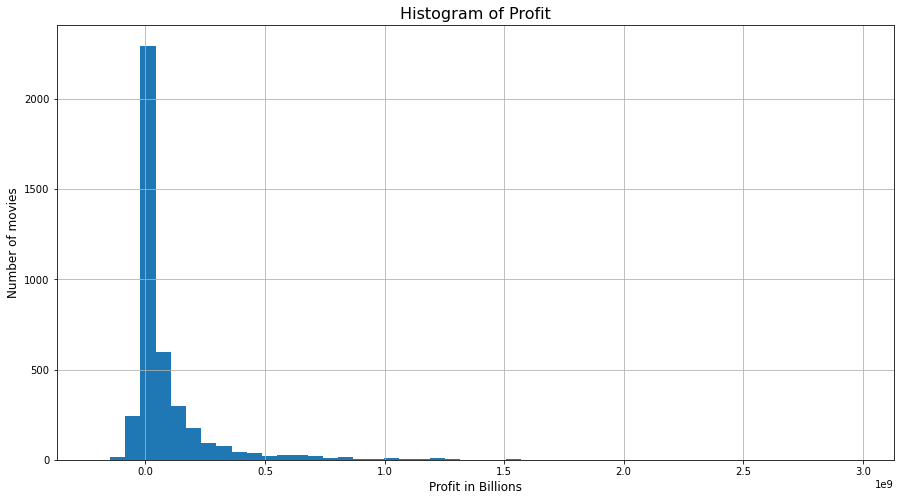

In [128]:
plt.figure(figsize=(15,8))
movie_budgets_df['profit'].hist(bins=50)
plt.xlabel('Profit in Billions', fontsize=12)
plt.ylabel('Number of movies', fontsize =12)
plt.title('Histogram of Profit', fontsize=16)
plt.savefig('HistogramOfProfit');

When looking at the histogram above, most movies either made a loss or made very little in profit. Most of the movies ranged within this category while very few made profits of 0.5 billion and above. When looking at the summary of statistics above, the mean profit lied at 84,000,000  and this could be misleading. The median was about 15,000,000, so the positive outliers were pulled the mean up, so the median was be a better representation of average for the analysis, since it wasn't affected by outliers. 

#### A look at the profitable movies. The top 500 movies

In [129]:
# assigned that to a new variable
most_profitable_movies = movie_budgets_df.sort_values(by='profit', ascending=False)[:500]
most_profitable_movies

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit,profit_margin(%)
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09,553.257713
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,2015,3.498349e+08,2.347451e+09,1.997616e+09,571.016739
6,"Apr 27, 2018",Avengers: Infinity War,2018,3.237305e+08,2.210145e+09,1.886415e+09,582.711400
33,"Jun 12, 2015",Jurassic World,2015,2.457990e+08,1.885056e+09,1.639256e+09,666.909239
425,"Dec 17, 2003",The Lord of the Rings: The Return of the King,2003,1.384303e+08,1.680903e+09,1.542472e+09,1114.258873
...,...,...,...,...,...,...,...
2119,"Jan 16, 2009",Paul Blart: Mall Cop,2009,3.283918e+07,2.348062e+08,2.019670e+08,615.018269
849,"Sep 9, 2016",Sully,2016,6.774052e+07,2.692963e+08,2.015558e+08,297.540927
382,"Dec 15, 2006",Eragon,2006,1.344097e+08,3.353363e+08,2.009266e+08,149.488115
2182,"Dec 15, 2000",Chocolat,2000,3.933943e+07,2.399711e+08,2.006316e+08,510.001372


In [130]:
#summary of statistics
filt = ['adj_production_budget', 'adj_worldwide_gross', 'profit', 'profit_margin(%)']
most_profitable_movies[filt].describe()

,adj_production_budget,adj_worldwide_gross,profit,profit_margin(%)
count,5.000000e+02,5.000000e+02,5.000000e+02,500.000000
mean,1.322388e+08,6.162172e+08,4.839784e+08,661.460129
std,8.156644e+07,3.645892e+08,3.157768e+08,2036.704560
min,5.683705e+05,2.121767e+08,1.996343e+08,79.152467
25%,6.740221e+07,3.609718e+08,2.606786e+08,239.862421
50%,1.242286e+08,5.010447e+08,3.699479e+08,358.160267
75%,1.888472e+08,7.719437e+08,6.163166e+08,597.716195
max,5.367944e+08,3.506651e+09,2.969856e+09,43051.785333


#### Histogram of Profit for the most_profitable_movies

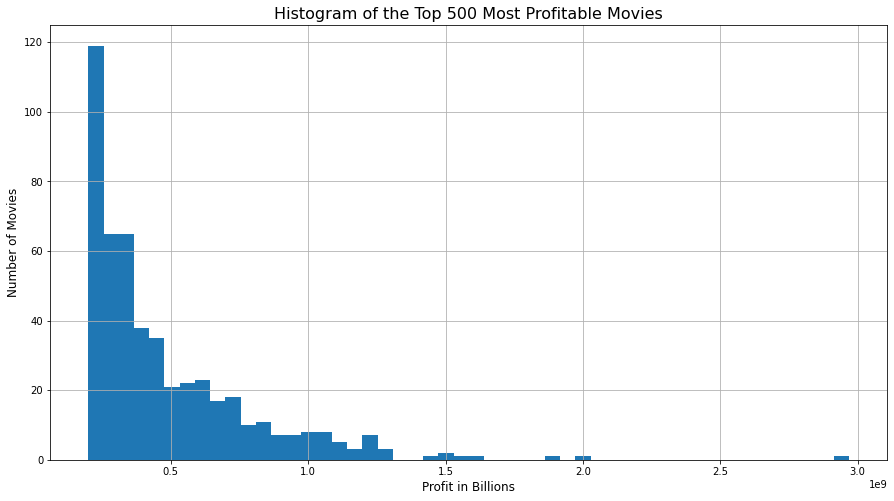

In [131]:
plt.figure(figsize=(15,8))
most_profitable_movies['profit'].hist(bins=50)
plt.xlabel('Profit in Billions', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Histogram of the Top 500 Most Profitable Movies', fontsize=16)
plt.savefig('Histogram_Top_500_Profitable_Movies');

From the histogram, most movies made a profit of about 300 million and the outlier could be spotted, which made close to 3bn in profit. In the summary of statistics, the median was at 360 million thus a better representation of the data compared to the mean which was at 0.5billion. The mean profit margin was quite high at more than 600% while the median one was at 350%. In the top 500 movies the minimum profit margin was 80% which meant that the ROI was incredible.

### A look at the production budget verse the profit margin of the most profitable movies

Created a scatter plot to show the general trend

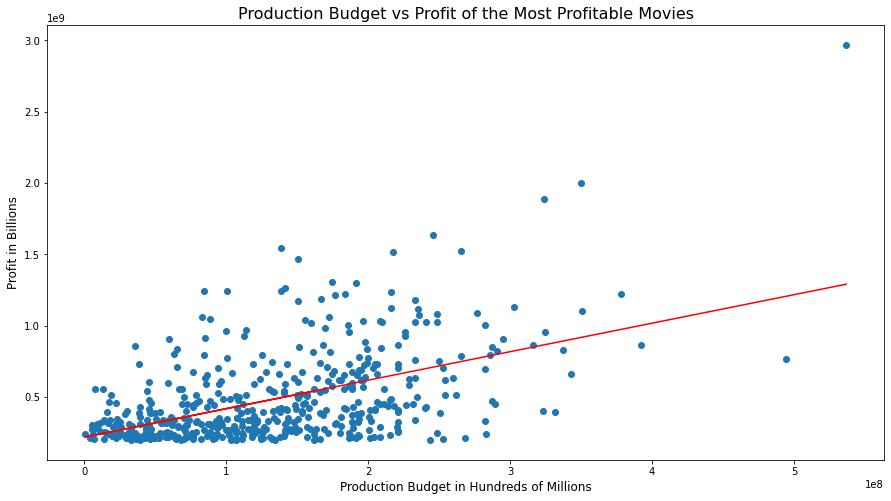

In [132]:
plt.figure(figsize=(15,8))
#defined the data
x = most_profitable_movies['adj_production_budget']
y = most_profitable_movies['profit']

#find line of best fit
a,b = np.polyfit(x,y,1)

#add points to plot
plt.scatter(x, y)

#add line of best fit to plot
plt.plot(x, a*x+b, color='red')

#label title and labels
plt.xlabel('Production Budget in Hundreds of Millions', fontsize=12)
plt.ylabel('Profit in Billions', fontsize=12)
plt.title('Production Budget vs Profit of the Most Profitable Movies', fontsize=16)
plt.savefig('ProductionBudgetVsProfitOfMostProfitableMovies');

Calculated the correlation for the most_profitable_movies

In [133]:
production_budget =  most_profitable_movies['adj_production_budget']
profit = most_profitable_movies['profit']
production_budget.corr(profit)

0.5155371987084504

Both the correlation value and the trend of the scatter plot showed a positive correlation. It indicated that an increase in production budget resulted in an increase in the profit margins.

#### Top 50 most profitabe movies

Created a dataframe of these movies

In [134]:
# assigned this to a new variable
top50_profitable_movies = movie_budgets_df.sort_values(by='profit', ascending=False)[:50]
top50_profitable_movies

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit,profit_margin(%)
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09,553.257713
5,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,2015,3.498349e+08,2.347451e+09,1.997616e+09,571.016739
6,"Apr 27, 2018",Avengers: Infinity War,2018,3.237305e+08,2.210145e+09,1.886415e+09,582.711400
33,"Jun 12, 2015",Jurassic World,2015,2.457990e+08,1.885056e+09,1.639256e+09,666.909239
425,"Dec 17, 2003",The Lord of the Rings: The Return of the King,2003,1.384303e+08,1.680903e+09,1.542472e+09,1114.258873
26,"May 4, 2012",The Avengers,2012,2.655481e+08,1.791489e+09,1.525941e+09,574.638176
66,"Apr 3, 2015",Furious 7,2015,2.172178e+08,1.736282e+09,1.519064e+09,699.327786
260,"Jul 15, 2011",Harry Potter and the Deathly Hallows: Part II,2011,1.505797e+08,1.616254e+09,1.465674e+09,973.354526
155,"Nov 22, 2013",Frozen,2013,1.744764e+08,1.480107e+09,1.305630e+09,748.313273
262,"Nov 16, 2001",Harry Potter and the Sorcerer's Stone,2001,1.912549e+08,1.491861e+09,1.300606e+09,680.038085


Created a bar graph with the profits and budgets for comparison. 

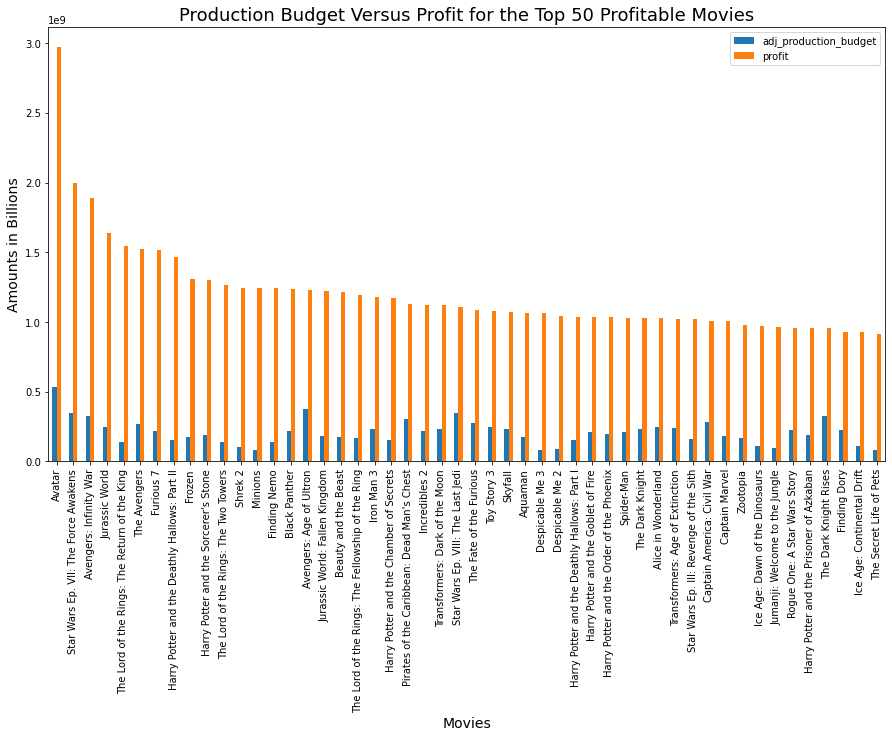

In [135]:
# barchart using matplotlib
top50_profitable_movies.plot.bar(x ='movie', y=['adj_production_budget','profit'], figsize=(15,8));

# labeling the axis
plt.xlabel('Movies', fontsize =14)
plt.ylabel('Amounts in Billions', fontsize = 14)

# label the title
plt.title('Production Budget Versus Profit for the Top 50 Profitable Movies', fontsize=18)
plt.savefig('ProductionBudgetVersusProfitfortheTop50ProfitableMovies');

In [136]:
#summary of the statistics 
filt = ['adj_production_budget','adj_production_budget', 'profit', 'profit_margin(%)']
top50_profitable_movies[filt].describe()

,adj_production_budget,adj_production_budget,profit,profit_margin(%)
count,5.000000e+01,5.000000e+01,5.000000e+01,50.000000
mean,2.086227e+08,2.086227e+08,1.205937e+09,658.507889
std,8.716258e+07,8.716258e+07,3.458927e+08,272.787679
min,8.290939e+07,8.290939e+07,9.164734e+08,294.341491
25%,1.518001e+08,1.518001e+08,1.023945e+09,460.523329
50%,2.020747e+08,2.020747e+08,1.096929e+09,577.128960
75%,2.444412e+08,2.444412e+08,1.241620e+09,771.497170
max,5.367944e+08,5.367944e+08,2.969856e+09,1468.021855


### Conclusion on the Production Budget and the Most Profitable Movies

The most profitable movie of all time was Avatar, which made close to 3billion with a profit margin of 553%, which was not the highest profit margin. Avatar stood out as the most profitable movie in terms of the amount of profits it made. Following closely was Star Wars Ep. VII: The Force Awakens, at close to 2billion and 571% profit margin. Others in the list included - Avengers:Infinity War, Jurassic World and The Lord of the Rings: The Return of the King which came at 5th position. It was quite incredible how The Lord of the Rings: The Return of the King made it to the top 10 being one of the oldest films in the data set. Probably it would have made more if it had been released in more recent years. 

The top 50 had quite a high profit margin of 1billion and above based on the graph and the median value from the statistics. The median profit margin went up upto 500% while the minimum profit margin was just below 300%.

The median production budget for the top 500 and top 50 was 120million and 200million respectively with expected profit margins of 358% and 577% respectively. This translated to a very high Return on Investment(ROI). 

The likelihood of seeing a profit on the movies does increase with the more money that is spent on production, but the likelihood of a profit must be caused by what the money is spent on, not just spending the money on an average production. 

Of course there are other factors to consider which can be investigated later. It is also important to note that when the whole data set was analyzed, most movies made losses or very minimal profits. This is also a possibility that should not be ignored.

# Question 2: Which movie genres are most commonly produced and how do they relate to their respective ratings?

In [137]:
movie_basics_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73050,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8


In [138]:
# A look at the different types of genres we have
movie_basics_ratings_df['genres'].value_counts().head(20)

Drama                    11612
Documentary              10313
Comedy                    5613
Horror                    2692
Comedy,Drama              2617
Thriller                  1555
Drama,Romance             1510
Comedy,Romance            1236
Comedy,Drama,Romance      1208
Horror,Thriller           1004
Drama,Thriller             990
Action                     979
Romance                    717
Biography,Documentary      694
Documentary,Drama          582
Documentary,Music          579
Comedy,Horror              579
Action,Crime,Drama         562
Crime,Drama,Thriller       504
Crime,Drama                494
Name: genres, dtype: int64

We have movies that have more than one genre in the description. To make this analysis simpler, I just picked the first genre as the genre of the movie and ignored the rest and assigned it to a new column

In [139]:
# Selected the genre column and split the values at the comma and reassigned the values to the genre column
movie_basics_ratings_df['genres'] = movie_basics_ratings_df['genres'].apply(lambda x: x.split(','))

# created a new column and assigned the first genre from the genre column for each record
movie_basics_ratings_df['picked_genres'] = movie_basics_ratings_df['genres'].apply(lambda x:x[0])
movie_basics_ratings_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,picked_genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"[Action, Crime, Drama]",7.0,77,Action
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"[Biography, Drama]",7.2,43,Biography
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,[Drama],6.9,4517,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"[Comedy, Drama]",6.1,13,Comedy
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"[Comedy, Drama, Fantasy]",6.5,119,Comedy
...,...,...,...,...,...,...,...,...,...
73047,tt9913056,Swarm Season,Swarm Season,2019,86.0,[Documentary],6.2,5,Documentary
73048,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,[Documentary],6.2,6,Documentary
73049,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"[Drama, Family]",8.7,136,Drama
73050,tt9914642,Albatross,Albatross,2017,NaN,[Documentary],8.5,8,Documentary


In [140]:
#A look at the new genres we have
movie_basics_ratings_df['picked_genres'].value_counts()

Drama          18572
Comedy         14649
Documentary    13962
Action          6988
Horror          4490
Biography       3433
Adventure       2596
Crime           2494
Thriller        1563
Animation        962
Romance          786
Family           604
Mystery          433
Fantasy          429
Sci-Fi           388
Music            192
Musical          153
History          136
Sport             89
Western           75
War               47
Reality-TV         5
News               4
Game-Show          1
Adult              1
Name: picked_genres, dtype: int64

#### Histogram of the Picked Genres

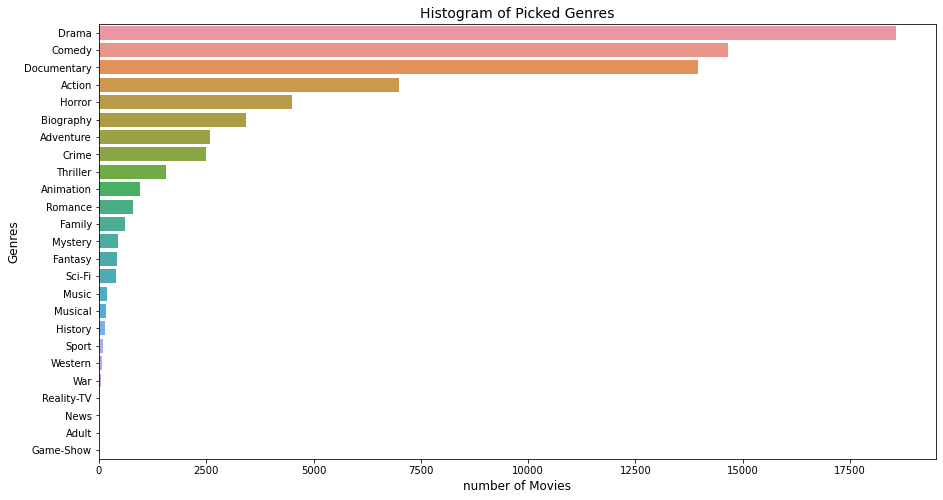

In [141]:
#created a dataframe grouped and sorted by the genres
genres_count_df = movie_basics_ratings_df.groupby('picked_genres', as_index=False)['movie_id'].count().sort_values(by='movie_id', ascending=False)

#Plotted the histogram
plt.figure(figsize=(15,8))
sns.barplot(x=genres_count_df['movie_id'], y=genres_count_df['picked_genres'])
plt.xlabel('number of Movies', fontsize=12)
plt.ylabel('Genres', fontsize=12)
plt.title('Histogram of Picked Genres', fontsize=14)
plt.savefig('HistogramofGenres');

The most common genre was drama, followed by comedy and then documentary and so on. The least common genres were Adult, Reality_TV, Game-Show and so on. 

#### Histogram of the Average Rating

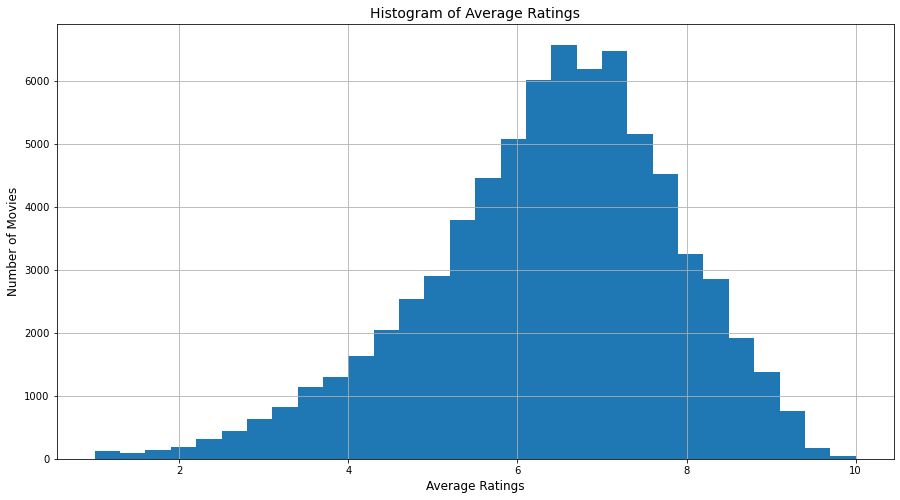

In [142]:
plt.figure(figsize=(15,8))
movie_basics_ratings_df['averagerating'].hist(bins=30)
plt.xlabel('Average Ratings', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)
plt.title('Histogram of Average Ratings', fontsize=14)
plt.savefig('HistogramofAverageRatings');

In [143]:
# Summary of statistics
movie_basics_ratings_df['averagerating'].describe()

count    73052.000000
mean         6.330930
std          1.474699
min          1.000000
25%          5.500000
50%          6.500000
75%          7.400000
max         10.000000
Name: averagerating, dtype: float64

From the histogram, most movies have been rated at approx. 7 out of 10 which was quite high. From the summary of statistics, the median value 6.5 gave the most accurate reading of the data compared to the mean at 6.3 which seems to be slightly low

#### Compared the rating of the movies and the genres

Created a dataframe with all the picked genres grouped and their equivalent average rating

In [144]:
genres_ratings_df = movie_basics_ratings_df.groupby('picked_genres', as_index=False)['averagerating'].mean().sort_values(by='averagerating', ascending=False)
genres_ratings_df.head(10)

,picked_genres,averagerating
11,Game-Show,9.000000
14,Music,7.506771
7,Documentary,7.316595
4,Biography,7.174512
21,Sport,6.944944
15,Musical,6.637255
12,History,6.413235
2,Adventure,6.386710
8,Drama,6.370563
3,Animation,6.252391


#### Bar Chart comparing Genres Versus The Average Rating

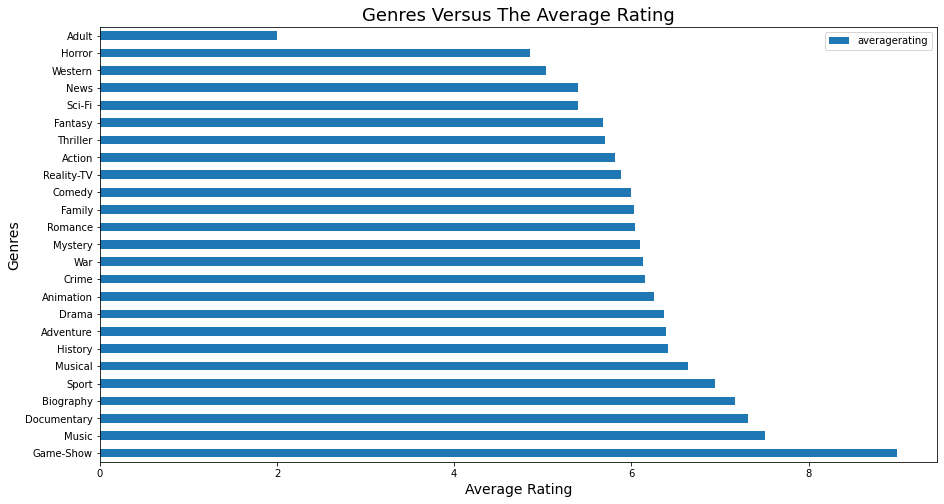

In [145]:
# barchart using matplotlib
genres_ratings_df.plot.barh(x ='picked_genres', y='averagerating', figsize=(15,8));

# labeling the axis
plt.xlabel('Average Rating', fontsize =14)
plt.ylabel('Genres', fontsize = 14)

# label the title
plt.title('Genres Versus The Average Rating', fontsize=18)
plt.savefig('GenresVersusTheAverageRating');

### Conclusion on the Production Budget and the Most Profitable Movies

As seen previously, the top 3 most common genres were Drama, Comedy and Documentary while the least watched genres were Game-Show, Adult and News. 

Surprisingly the highest rated genre was Game-Show. The most common genres drama, comedy and documentary had average ratings. This meant that a high rating of a genre didn't necessarily mean that it was going to be the most popular. Actually, the most popular genres had average ratings. 

## Question 3: Which are the best months of the year to release a movie based on the profits?

Months that had the most movie releases.

In [146]:
# Viewed the dataframe
movie_budgets_df

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit,profit_margin(%)
0,"Dec 18, 2009",Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09,553.257713
1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,2011,4.946242e+08,1.259646e+09,7.650219e+08,154.667286
2,"Jun 7, 2019",Dark Phoenix,2019,3.709638e+08,1.587326e+08,-2.122312e+08,-57.210757
3,"May 1, 2015",Avengers: Age of Ultron,2015,3.779589e+08,1.603998e+09,1.226039e+09,324.384139
4,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,2017,3.504304e+08,1.455581e+09,1.105151e+09,315.369636
...,...,...,...,...,...,...,...
5774,"Oct 8, 2004",Primer,2004,1.004124e+04,1.207711e+06,1.197670e+06,11927.514286
5775,"May 26, 2006",Cavite,2006,9.408681e+03,9.629650e+04,8.688782e+04,923.485714
5776,"Dec 31, 2004",The Mongol King,2004,1.004124e+04,1.291016e+03,-8.750222e+03,-87.142857
5779,"Jul 13, 2005",Return to the Land of Wonders,2005,6.937276e+03,1.856415e+03,-5.080861e+03,-73.240000


Converted the release_date column to date format so that I could extract the month of release

In [147]:
#Converted the Release Date field to type datetime.
movie_budgets_df['release_date'] = pd.to_datetime(movie_budgets_df['release_date'])

In [148]:
#Added a new column called release_month, displaying only the month from the release date.
movie_budgets_df['release_month'] = [x.strftime('%B') for x in movie_budgets_df['release_date']]
movie_budgets_df

,release_date,movie,release_year,adj_production_budget,adj_worldwide_gross,profit,profit_margin(%),release_month
0,2009-12-18,Avatar,2009,5.367944e+08,3.506651e+09,2.969856e+09,553.257713,December
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,2011,4.946242e+08,1.259646e+09,7.650219e+08,154.667286,May
2,2019-06-07,Dark Phoenix,2019,3.709638e+08,1.587326e+08,-2.122312e+08,-57.210757,June
3,2015-05-01,Avengers: Age of Ultron,2015,3.779589e+08,1.603998e+09,1.226039e+09,324.384139,May
4,2017-12-15,Star Wars Ep. VIII: The Last Jedi,2017,3.504304e+08,1.455581e+09,1.105151e+09,315.369636,December
...,...,...,...,...,...,...,...,...
5774,2004-10-08,Primer,2004,1.004124e+04,1.207711e+06,1.197670e+06,11927.514286,October
5775,2006-05-26,Cavite,2006,9.408681e+03,9.629650e+04,8.688782e+04,923.485714,May
5776,2004-12-31,The Mongol King,2004,1.004124e+04,1.291016e+03,-8.750222e+03,-87.142857,December
5779,2005-07-13,Return to the Land of Wonders,2005,6.937276e+03,1.856415e+03,-5.080861e+03,-73.240000,July


In [149]:
#Counted the total number of movies and group by month and assigned to a new variable
movie_months_df = movie_budgets_df.groupby(['release_month'], as_index=False)['movie'].count().sort_values(by='movie', ascending=False)
movie_months_df

,release_month,movie
2,December,441
10,October,410
11,September,374
0,April,351
1,August,350
7,March,345
9,November,334
6,June,312
5,July,307
3,February,289


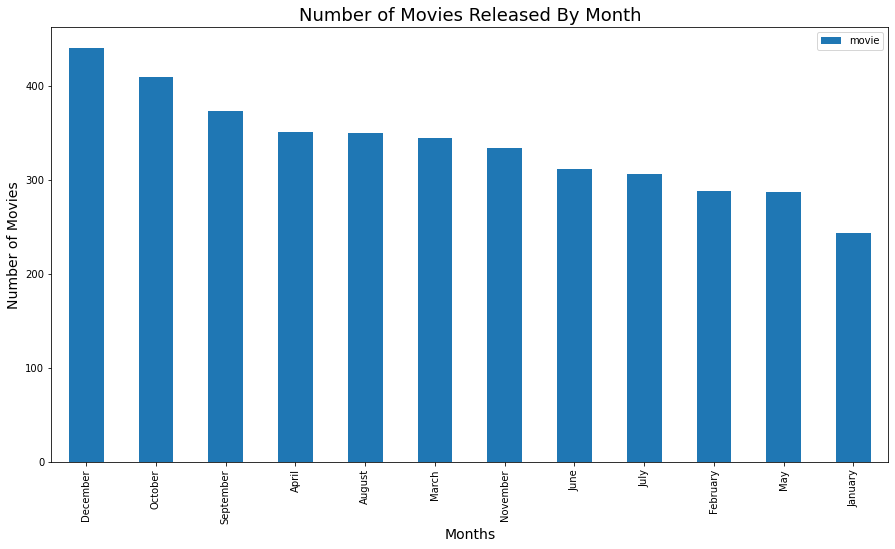

In [150]:
#Plot the above findings in order by month.
movie_months_df.plot.bar(x ='release_month', y='movie', figsize=(15,8))

# label the axis
plt.xlabel('Months', fontsize =14)
plt.ylabel('Number of Movies', fontsize = 14)

# label the title
plt.title('Number of Movies Released By Month', fontsize=18)
plt.savefig('NumberofMoviesReleasedByMonth');

A look at the profits based on the months the movies were released. 

In [151]:
# group the movies by month, showing the average net profit for each
profit_month_df = movie_budgets_df.groupby('release_month', as_index=False)[['profit', 'profit_margin(%)']].mean().sort_values(by='profit', ascending=False)
profit_month_df

,release_month,profit,profit_margin(%)
8,May,1.614345e+08,389.793415
5,July,1.359633e+08,385.151673
6,June,1.334994e+08,269.564409
9,November,1.303311e+08,222.235207
2,December,1.132483e+08,191.435151
7,March,7.004360e+07,201.591325
3,February,6.526976e+07,230.099565
1,August,5.306850e+07,256.326923
0,April,5.176940e+07,224.008235
4,January,4.317065e+07,262.230967


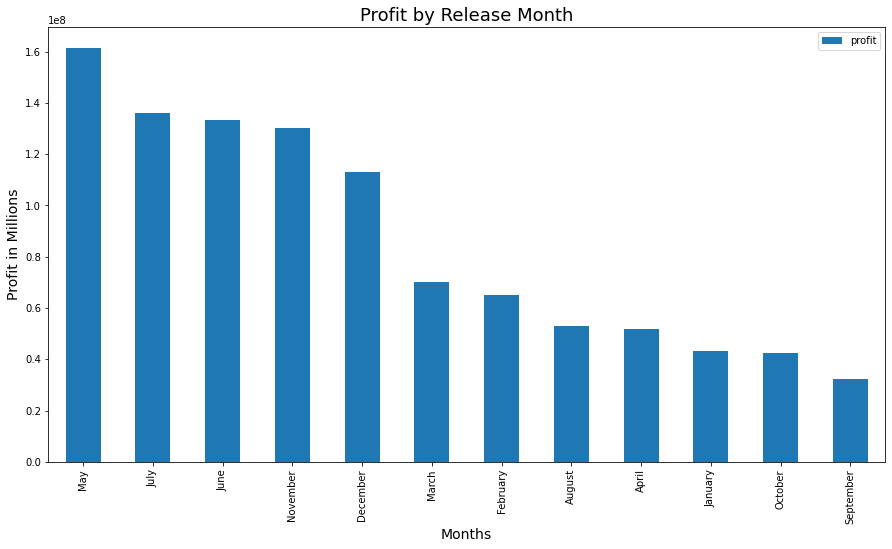

In [152]:
#Plot the above findings in order by month.
profit_month_df.plot.bar(x ='release_month', y='profit', figsize=(15,8))

# label the axis
plt.xlabel('Months', fontsize =14)
plt.ylabel('Profit in Millions', fontsize = 14)

# label the title
plt.title('Profit by Release Month', fontsize=18)
plt.savefig('ProfitbyReleaseMonth');

December lead by the number of movies released within that month followed by October and then September. While May, July and June lead by the profit made by movies released in those months. Those 3 months lie in the middle of the year and the reason why these happens needs to be investigated further. May, June and July had fewer movie releases compared to the rest of the year and probably the smaller volume of movies brought up the average of the profits. 

## CONCLUSION

There are many factors to consider before I give a recommendation to the company on which direction to follow. In short, this analysis is not conclusive, however, it can give a general overview of the movie industry. Further analysis is required and more data needs to be obtained before MIcrosoft adopts the recommendations given in this analysis. So for this EDA, I have come up with the following conclusions to the following questions:

###### Question 1: How much should you spend in the production of a movie and which movies were the most profitable?
Microsoft needs to spend 120million to 200million USD and expect an ROI of 300% and above. 

###### Question 2: Which movie genres are most commonly produced and how do they relate to their respective ratings?
Microsoft should focus on the following top 5 movie genres based on popularity; Drama, Comedy, Documentary, Action and Horror in that order. It's important to note that these genres are not the best based on the average ratings. Being that these are the most popular genres, the number of ratings could have brought down the average rating. This is an important factor to consider and should be analyzed in the future.

###### Question 3: Which are the best months of the year to release a movie?
Based on the data, I recommend that the movies are released in May, June and July. This is where we have had the highest profit margins recorded. The reason why these particular months have the highest profits needs to be further investigated.